### PREVISION DES PRIX MOYEN DE LOGEMENT

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# INFORMATION SUR LA DATA  
    
    # Le nombre de mutations
   # Le nombre de ventes de maisons et d'appartements
   # La proportion de ventes de maisons et d'appartements
   # Le prix moyen des biens vendus
   # Le prix moyen au m2 des biens vendus
   # La surface moyenne des biens vendus
   #Ces données sont dérivées d'un traitement de la base DVF géolocalisée, voici les mutations prises en comptes:
   # Mutation monoventes (pas de ventes en lots)
   #une mutation correspond à un transfert de propriété réalisé à titre onéreux sur des biens immobiliers.
   #Cela peut se produire lors d'une vente, d'une donation, d'un héritage, d'un échange,
   # Prix entre 15 000 € et 10 000 000 €
   # Surfaces des appartements (entre 10m² et 250m²) et surfaces des maisons (entre 10m² et 400m²)
   # Prix au m² entre 330 €/m² et 15 000 €/m²

In [3]:
# K-means (k-moyens en français) est un algorithme de clustering. 
# Le clustering est un type d’apprentissage non supervisé 
#(contrairement à la regression linéaire par exemple qui est un type d’apprentissage supervisé). 
# Il consiste à regrouper les éléments de notre jeu de donnée en groupes, appelés clusters. 
# Le but est de faire ressortir les patterns cachés dans la donnée en regroupant les éléments qui se « ressemblent ».

In [4]:
dt_departement = pd.read_csv("donnees_biens_associe_dept.csv",delimiter=';', index_col= [0])
dt_departement.head()

,INSEE_COM,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,1001,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,1002,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,1004,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,1005,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,1007,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [5]:
dt_departement = dt_departement.dropna()
dt_departement.count()

INSEE_COM       30010
Nom_DEPT        30010
Nb_mutations    30010
NbMaisons       30010
NbApparts       30010
propmaison      30010
propappart      30010
PrixMoyen       30010
Prixm2Moyen     30010
SurfaceMoy      30010
dtype: int64

In [6]:
#Effaçon la colonne code des communes

dt_departement = dt_departement.drop(columns = ['INSEE_COM'])
dt_departement.head()

,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


##### ANALYSE STATISTIQUES

In [7]:
dt_departement.describe()

,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
count,30010.000000,30010.000000,30010.000000,30010.000000,30010.000000,3.001000e+04,30010.000000,30010.000000
mean,25.520293,14.234022,11.286271,92.931494,7.068506,1.910578e+05,1975.922665,100.195354
std,209.136912,33.794406,194.214713,17.291248,17.291248,1.038155e+05,1017.955701,27.066416
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,400.000000,10.000000
25%,3.000000,3.000000,0.000000,100.000000,0.000000,1.234812e+05,1315.500000,84.666667
50%,6.000000,6.000000,0.000000,100.000000,0.000000,1.714625e+05,1761.833333,97.500000
75%,15.000000,13.000000,0.000000,100.000000,0.000000,2.343594e+05,2363.000000,112.000000
max,26511.000000,1213.000000,26415.000000,100.000000,100.000000,1.650890e+06,14000.000000,337.000000


### LE CLUSTERING DU PRIX MOYEN SELON LA SURFACE MOYENNE

In [8]:
dt_departement.columns =['Departement','Nb_mutations','Nb_vente_Maison','Nb_vente_Appart','prop_vente_maison','prop_vente_Appart','PrixMoyen','Prixm2Moyen','SurfaceMoy']
dt_departement.head()

,Departement,Nb_mutations,Nb_vente_Maison,Nb_vente_Appart,prop_vente_maison,prop_vente_Appart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [9]:
# Sélection des colonnes numériques pour le clustering
features = ['Nb_mutations', 'Nb_vente_Maison', 'Nb_vente_Appart', 'prop_vente_maison', 'prop_vente_Appart', 'PrixMoyen', 'Prixm2Moyen', 'SurfaceMoy']

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dt_departement[features])

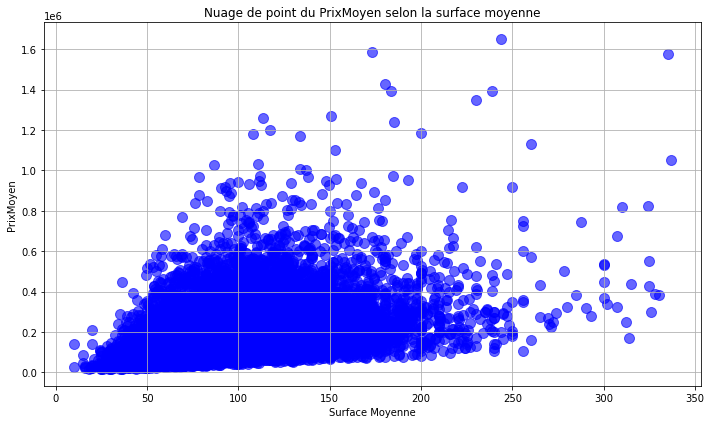

In [10]:
# Distribution de PrixMoyen
plt.figure(figsize=(10, 6))
plt.scatter(dt_departement['SurfaceMoy'], dt_departement['PrixMoyen'], c='blue', alpha =0.6, edgecolors='b', s=100)
plt.title('Nuage de point du PrixMoyen selon la surface moyenne')
plt.xlabel('Surface Moyenne')
plt.ylabel('PrixMoyen')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Définir le nombre de clusters (par exemple, 3)

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X_scaled)

# Ajouter les étiquettes de clusters au DataFrame
dt_departement['Cluster'] = kmeans.labels_

print(dt_departement)

      Departement  Nb_mutations  Nb_vente_Maison  Nb_vente_Appart  \
1             Ain             8              8.0              0.0   
2             Ain             2              2.0              0.0   
3             Ain           158             89.0             69.0   
4             Ain            27             22.0              5.0   
5             Ain            39             38.0              1.0   
...           ...           ...              ...              ...   
30006  Val-d'Oise             2              2.0              0.0   
30007  Val-d'Oise            10              8.0              2.0   
30008  Val-d'Oise           144             45.0             99.0   
30009  Val-d'Oise             1              1.0              0.0   
30010  Val-d'Oise             3              3.0              0.0   

       prop_vente_maison  prop_vente_Appart      PrixMoyen  Prixm2Moyen  \
1             100.000000           0.000000  269375.000000  2249.500000   
2             100.000

In [12]:
dt_departement = pd.DataFrame(dt_departement)

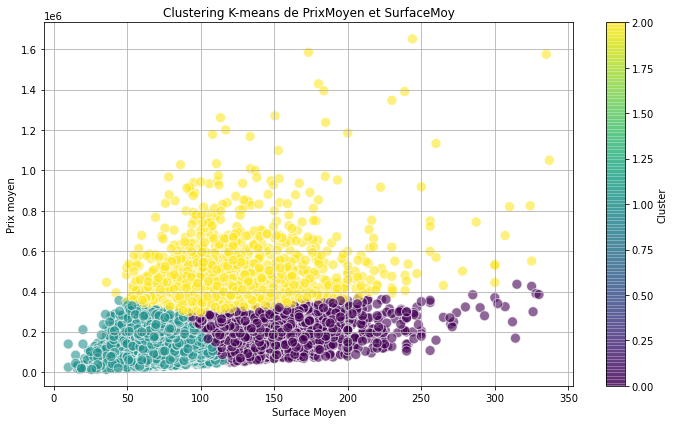

In [100]:
# Sélection des colonnes pertinentes
X = dt_departement[['PrixMoyen', 'SurfaceMoy']]

# Standardisation des données (optionnel mais recommandé)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Ajouter les étiquettes de clusters au DataFrame
dt_departement['Cluster'] = kmeans.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(dt_departement['SurfaceMoy'],dt_departement['PrixMoyen'], c=dt_departement['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.title('Clustering K-means de PrixMoyen et SurfaceMoy')
plt.xlabel('Surface Moyen')
plt.ylabel('Prix moyen')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
# Afficher les paramètres du modèle
print("Nombre de clusters :", kmeans.n_clusters)
print("Centres des clusters :", kmeans.cluster_centers_)
print("Inertie :", kmeans.inertia_)
print("Labels des clusters :", kmeans.labels_)

Nombre de clusters : 3
Centres des clusters : [[ 0.13011798  0.82054461]
 [-0.46202614 -0.57722453]
 [ 2.10314431  0.45113584]]
Inertie : 29653.737555518514
Labels des clusters : [0 1 1 ... 1 1 2]


###### 29653.73 est la somme des distances au carré des échantillons à leur centre de cluster le plus proche. Une inertie plus faible indique une meilleure cohésion des clusters.

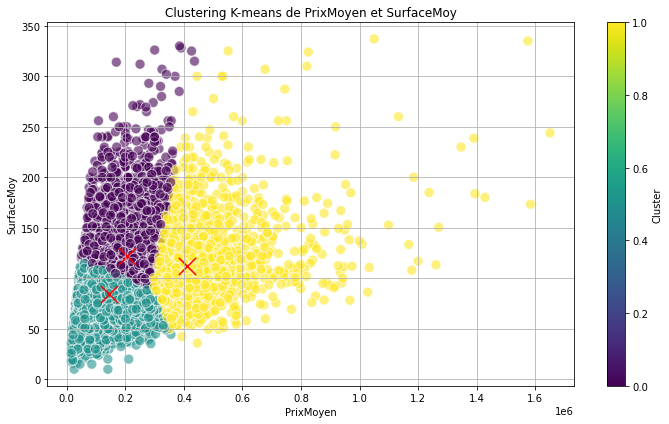

In [103]:
# Visualisation des clusters avec les centres de clusters
plt.figure(figsize=(10, 6))
plt.scatter(dt_departement['PrixMoyen'], dt_departement['SurfaceMoy'], c=dt_departement['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters
plt.title('Clustering K-means de PrixMoyen et SurfaceMoy')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()

### LE CLUSTERING DU PRIX MOYEN SELON LA SURFACE ET LE DEPARTEMENT

In [24]:
dt_departement = pd.DataFrame(dt_departement)

# Sélection des colonnes pertinentes
X = dt_departement[['PrixMoyen','SurfaceMoy']]


In [25]:
# Standardisation des données (optionnel mais recommandé)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Ajouter les étiquettes de clusters au DataFrame
dt_departement['Cluster'] = kmeans.labels_


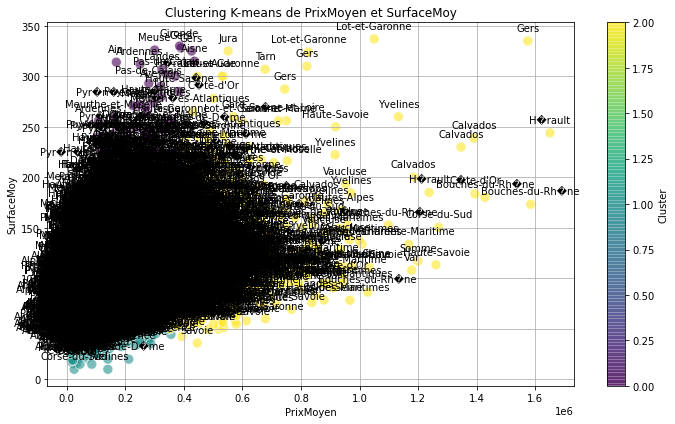

In [26]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(dt_departement['PrixMoyen'], dt_departement['SurfaceMoy'], c=dt_departement['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters

# Ajouter les annotations pour les départements
for i, row in dt_departement.iterrows():
    plt.annotate(row['Departement'], (row['PrixMoyen'], row['SurfaceMoy']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Clustering K-means de PrixMoyen et SurfaceMoy')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()

### Simplifions la visibilité avec les départements proche du centre des différents centre

In [27]:
# Calcul des distances entre chaque département et les centres des clusters
distances = kmeans.transform(X_scaled)
closest_clusters = np.argmin(distances, axis=1)

In [30]:
# Création d'un DataFrame avec les départements et leur cluster le plus proche
df_departement_closest_cluster = pd.DataFrame({'Departement': dt_departement['Departement'], 'ClosestCluster': closest_clusters})


In [32]:
# Affichage du nombre de départements par cluster le plus proche
print("Nombre de départements par cluster le plus proche :")
print(df_departement_closest_cluster['ClosestCluster'].value_counts())

Nombre de départements par cluster le plus proche :
1    16789
0    10144
2     3077
Name: ClosestCluster, dtype: int64


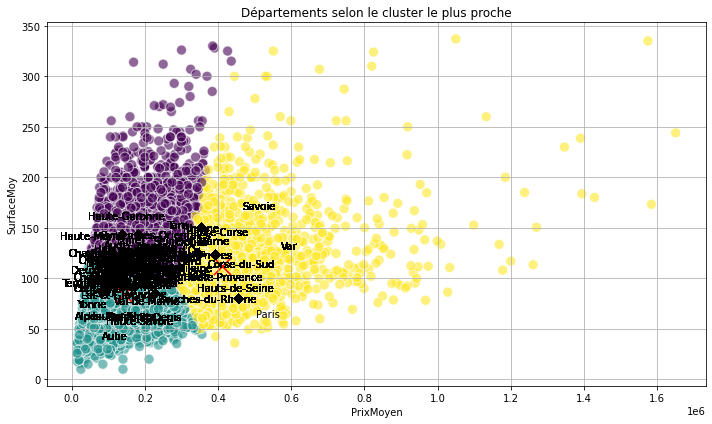

In [33]:
# Visualisation des départements selon le cluster le plus proche
plt.figure(figsize=(10, 6))
for cluster in df_departement_closest_cluster['ClosestCluster'].unique():
    departments = df_departement_closest_cluster[df_departement_closest_cluster['ClosestCluster'] == cluster]['Departement']
    for department in departments:
        plt.annotate(department, (dt_departement[dt_departement['Departement'] == department]['PrixMoyen'].values[0], 
                                   dt_departement[dt_departement['Departement'] == department]['SurfaceMoy'].values[0]), 
                     textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(dt_departement['PrixMoyen'], dt_departement['SurfaceMoy'], c=dt_departement['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters
plt.title('Départements selon le cluster le plus proche')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.tight_layout()
plt.grid(True)
plt.show()

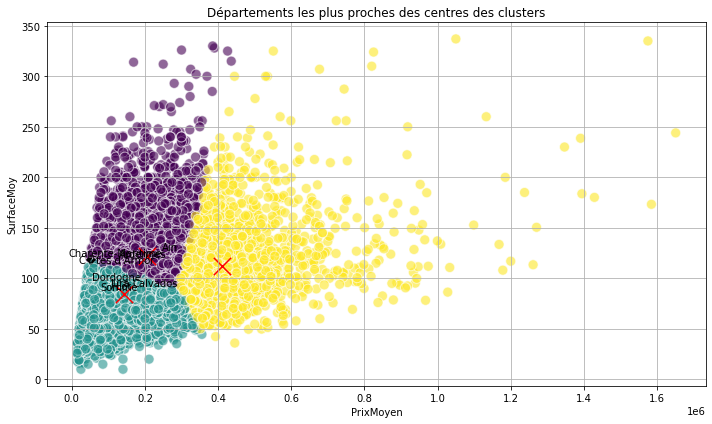

In [108]:
# Recherche des 3 départements les plus proches des centres des clusters
closest_departments = []
for cluster_center in kmeans.cluster_centers_:
    distances_to_center = np.linalg.norm(X_scaled - cluster_center, axis=1)
    closest_indices = np.argsort(distances_to_center)[:3]
    closest_departments.extend(dt_departement.iloc[closest_indices]['Departement'])

# Visualisation des départements les plus proches des centres des clusters
plt.figure(figsize=(10, 6))
for department in closest_departments:
    plt.annotate(department, (dt_departement[dt_departement['Departement'] == department]['PrixMoyen'].values[0], 
                               dt_departement[dt_departement['Departement'] == department]['SurfaceMoy'].values[0]), 
                 textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(dt_departement['PrixMoyen'], dt_departement['SurfaceMoy'], c=dt_departement['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters
plt.title('Départements les plus proches des centres des clusters')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.tight_layout()
plt.grid(True)
plt.show()


##### les départements Dordonnes, Aube proposent sensiblement un prix Moyen presque identique selon la surface moyenne
##### les départements Haute Garonnes, Ain proposent sensiblement un prix Moyen presque identique selon la surface moyenne
##### les départements Haute-de-Seine, Savoie proposent sensiblement un prix Moyen presque identique selon la surface moyenne

### INTERESSONS NOUS AU DEPARTEMENT DE LA SAVOIE

In [47]:
# chargement du fichier : 

dt_departement_Savoie = pd.read_csv("donnee_bienvendu_depart.csv",delimiter=';', index_col= [0])
dt_departement_Savoie.head()

,Nom_com,Id_commune,DEPT,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
1,ABERGEMENT CLEMENCIAT,1001,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,ABERGEMENT DE VAREY,1002,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,AMBERIEU EN BUGEY,1004,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,AMBERIEUX EN DOMBES,1005,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,AMBRONAY,1007,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [50]:
dt_departement_Savoie = dt_departement_Savoie.drop(columns = ['Id_commune'])
dt_departement_Savoie.head()

,Nom_com,DEPT,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
1,ABERGEMENT CLEMENCIAT,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,ABERGEMENT DE VAREY,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,AMBERIEU EN BUGEY,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,AMBERIEUX EN DOMBES,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,AMBRONAY,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [51]:

# Filtrage des données pour ne garder que celles du département de la Savoie

dt_departement_Savoie = dt_departement_Savoie[dt_departement_Savoie['DEPT'] == 'Savoie']
dt_departement_Savoie.head()

,Nom_com,DEPT,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
24313,AIGUEBELETTE LE LAC,Savoie,2,2.0,0.0,100.000000,0.000000,512397.500000,3392.000000,158.500000
24314,GRAND AIGUEBLANCHE,Savoie,32,17.0,15.0,53.125000,46.875000,232641.250000,2878.843750,82.625000
24315,AILLON LE JEUNE,Savoie,26,6.0,20.0,23.076923,76.923077,102500.192308,2339.230769,41.884615
24316,AILLON LE VIEUX,Savoie,1,0.0,1.0,0.000000,100.000000,101250.000000,596.000000,170.000000
24317,AIME LA PLAGNE,Savoie,118,28.0,90.0,23.728814,76.271186,196566.567797,4211.601695,49.033898


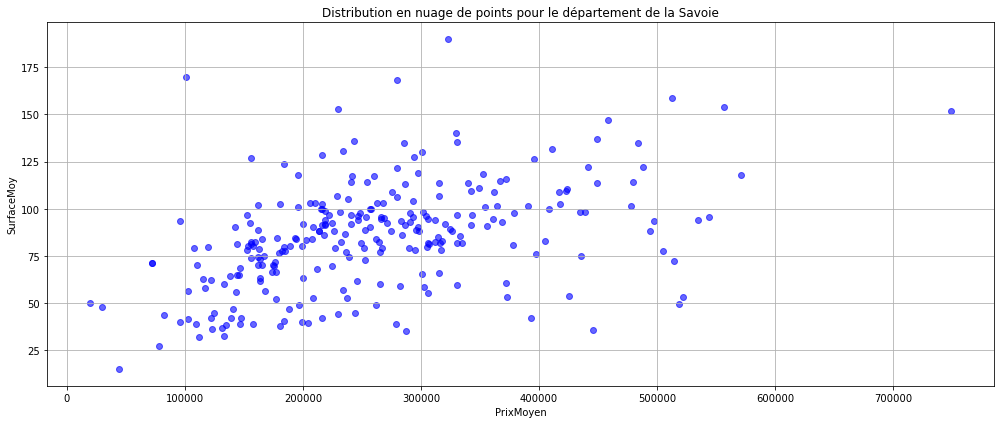

In [95]:

# Nuage de points pour la distribution des données pour le département de la Savoie
plt.figure(figsize=(14, 6))
plt.scatter(dt_departement_Savoie['prix_moyen_biens_vendus'], dt_departement_Savoie['surface_moyenne_biens_vendus'], color='blue', alpha=0.6)
plt.title('Distribution en nuage de points pour le département de la Savoie')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.tight_layout()
plt.grid(True)
plt.show()

In [60]:
dt_departement_Savoie = pd.DataFrame(dt_departement_Savoie)

In [62]:
# Sélection des colonnes pertinentes
X = dt_departement_Savoie[['prix_moyen_biens_vendus','surface_moyenne_biens_vendus']]

In [63]:
# Sélection des colonnes numériques pour le clustering
#features = ['nombre_mutations', 'nbr_vente_maison', 'nbr_vente_appartement', 'proportion_ventes_maisons', 'proportion_ventes_appartements', 'prix_moyen_biens_vendus', 'prix_moyen_m2_biens_vendus','surface_moyenne_biens_vendus']
# Standardisation des données
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(dt_departement_Savoie[features])

In [67]:
# Standardisation des données (optionnel mais recommandé)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
# Définir le nombre de clusters (par exemple, 3)

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X_scaled)

# Ajouter les étiquettes de clusters au DataFrame
dt_departement_Savoie['Cluster'] = kmeans.labels_

print(dt_departement_Savoie)

                   Nom_com    DEPT  nombre_mutations  nbr_vente_maison  \
24313  AIGUEBELETTE LE LAC  Savoie                 2               2.0   
24314   GRAND AIGUEBLANCHE  Savoie                32              17.0   
24315      AILLON LE JEUNE  Savoie                26               6.0   
24316      AILLON LE VIEUX  Savoie                 1               0.0   
24317       AIME LA PLAGNE  Savoie               118              28.0   
...                    ...     ...               ...               ...   
24573              VIMINES  Savoie                11              10.0   
24574                VIONS  Savoie                 2               2.0   
24575       VIVIERS DU LAC  Savoie                27              18.0   
24576              VOGLANS  Savoie                22              13.0   
24577                YENNE  Savoie                27              18.0   

       nbr_vente_appartement  proportion_ventes_maisons  \
24313                    0.0                 100.000

In [69]:
# Calcul des distances entre chaque commune et les centres des clusters
distances = kmeans.transform(X_scaled)
closest_communes = []
for i in range(kmeans.n_clusters):
    closest_idx = np.argmin(distances[:, i])
    closest_communes.append(dt_departement_Savoie.iloc[closest_idx]['Nom_com'])

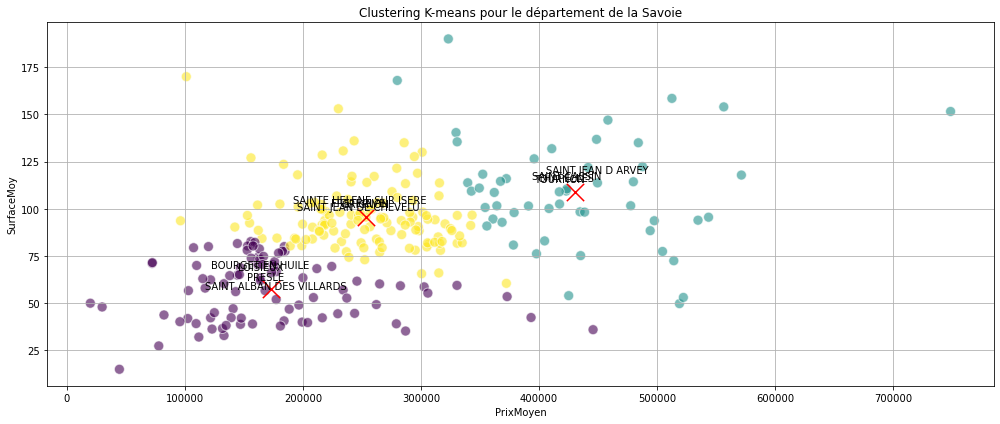

In [96]:
# Visualisation des communes les plus proches des centres des clusters
plt.figure(figsize=(14, 6))
for commune in closest_communes:
    row = dt_departement_Savoie[dt_departement_Savoie['Nom_com'] == commune]
    plt.annotate(commune, (row['prix_moyen_biens_vendus'].values[0], row['surface_moyenne_biens_vendus'].values[0]), textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(dt_departement_Savoie['prix_moyen_biens_vendus'], dt_departement_Savoie['surface_moyenne_biens_vendus'], c=dt_departement_Savoie['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters
plt.title('Clustering K-means pour le département de la Savoie')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.tight_layout()
plt.grid(True)
plt.show()

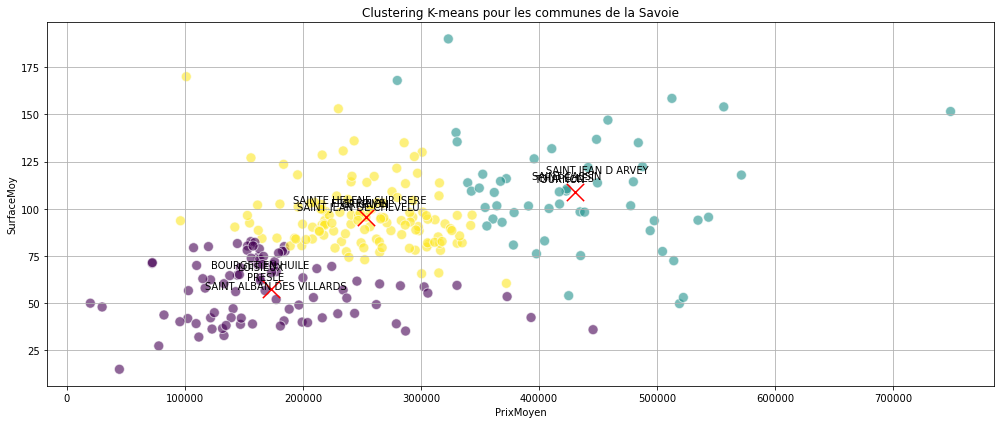

In [97]:
# Trouver les 3 communes les plus proches des centres des clusters
closest_communes = []
for i in range(kmeans.n_clusters):
    closest_indices = np.argsort(distances[:, i])[:4]
    closest_communes.extend(dt_departement_Savoie.iloc[closest_indices]['Nom_com'].values)

# Visualisation des communes les plus proches des centres des clusters
plt.figure(figsize=(14, 6))
for commune in closest_communes:
    row = dt_departement_Savoie[dt_departement_Savoie['Nom_com'] == commune]
    plt.annotate(commune, (row['prix_moyen_biens_vendus'].values[0], row['surface_moyenne_biens_vendus'].values[0]), textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(dt_departement_Savoie['prix_moyen_biens_vendus'], dt_departement_Savoie['surface_moyenne_biens_vendus'], c=dt_departement_Savoie['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters
plt.title('Clustering K-means pour les communes de la Savoie')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.tight_layout()
plt.grid(True)
plt.show()

##### les communes LOISIEUR, PRESLE, SAINT ALBANT DES VILLARDS proposent sensiblement un prix Moyen presque identique selon la surface moyenne
##### les communes SAINT HELENE SUR ISERE, SAINT JEAN DE CHEVELU,  proposent sensiblement un prix Moyen presque identique selon la surface moyenne
##### les Communes SAINT CASSIN, SAINT JEAN D'ARVEY proposent sensiblement un prix Moyen presque identique selon la surface moyenne

In [94]:
# Afficher les paramètres du modèle
print("Nombre de clusters :", kmeans.n_clusters)
print("Centres des clusters :", kmeans.cluster_centers_) ## coordonnées des centres cluster dans l'espace standartisé.
print("Inertie :", kmeans.inertia_)

Nombre de clusters : 3
Centres des clusters : [[-0.78266283 -0.99913438]
 [ 1.50609052  0.83387989]
 [-0.06983641  0.36742908]]
Inertie : 215.18025546770377


###### Un espace standardisé est un espace de représentation des données où les différentes dimensions (ou caractéristiques) des données ont été transformées pour avoir une moyenne de 0 et un écart-type de 1. Cette transformation est souvent effectuée en utilisant la technique de standardisation (ou normalisation) des données.

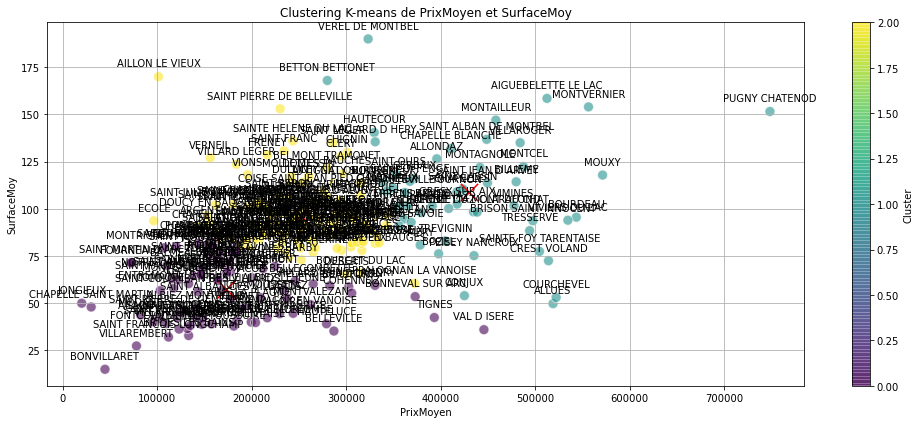

In [98]:
# Visualisation des clusters
plt.figure(figsize=(14, 6))
scatter = plt.scatter(dt_departement_Savoie['prix_moyen_biens_vendus'], dt_departement_Savoie['surface_moyenne_biens_vendus'], c=dt_departement_Savoie['Cluster'], cmap='viridis', s=100, edgecolors='w', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')  # Centres des clusters

# Ajouter les annotations pour les départements
for i, row in dt_departement_Savoie.iterrows():
    plt.annotate(row['Nom_com'], (row['prix_moyen_biens_vendus'], row['surface_moyenne_biens_vendus']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Clustering K-means de PrixMoyen et SurfaceMoy')
plt.xlabel('PrixMoyen')
plt.ylabel('SurfaceMoy')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()

##### INTERPRETATION  : la commune BONVILLARET est plutôt avantageuse, dans le où elle est la commune qui propose le minimum du rapport prix moyen et surface moyenne. 
##### La commune PUGNY CHATENOD est à l'extreme des previsions. 